
<!DOCTYPE doctype html>

<html lang="en">
<head>
<!-- Urbis magnitudo. Fabulas magnitudo. -->
<meta charset="utf-8"/>
<style>a.edit_from_site {display: none !important;}</style>
<title>
  The 50 Best Sandwiches in Chicago |
  Chicago magazine
      |  November 2012
    </title>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable = no" name="viewport">
<meta content="Our list of Chicago’s 50 best sandwiches, ranked in order of deliciousness" name="description"/>
<!-- <meta name="description" content="Our list of Chicago’s 50 best sandwiches, ranked in order of deliciousness"> -->
<meta content="sandwiches, dining" name="keywords"/>
<meta content="37873197144" property="fb:pages">
<link href="//cloud.typography.com" rel="dns-prefetch"/>
<link href="//www.googletagservices.com" rel="dns-prefetch"/>
<link href="//ajax.googleapis.com" rel="dns-prefetch"/>
<link href="//securepubads.g.doubleclick.net" rel="dns-prefetch"/>
<link href="//media.chicagomag.com
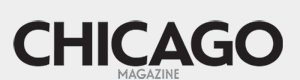

In [5]:
from bs4 import BeautifulSoup
from urllib.request import urlopen, urljoin

url_base = 'http://www.chicagomag.com'
url_sub = '/Chicago-Magazine/November-2012/Best-Sandwiches-Chicago/'
url = url_base + url_sub

html = urlopen(url)
soup = BeautifulSoup(html, 'html.parser')

soup

In [2]:
len(soup.find_all("div", "sammy"))

50

In [3]:
import re

In [6]:
rank = []
main_menu = []
cafe_name = []
url_add = []

list_soup = soup.find_all('div', 'sammy')

for item in list_soup:
    rank.append(item.find(class_='sammyRank').get_text())
    tmp_string = item.find(class_='sammyListing').get_text()
    
    main_menu.append(re.split(('\n|\r\n'), tmp_string)[0])
    cafe_name.append(re.split(('\n|\r\n'), tmp_string)[1])
    
    url_add.append(urljoin(url_base, item.find('a')['href']))

In [7]:
rank[:5]

['1', '2', '3', '4', '5']

In [8]:
url_add[:5]

['http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/',
 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Au-Cheval-Fried-Bologna/',
 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Xoco-Woodland-Mushroom/',
 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Als-Deli-Roast-Beef/',
 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Publican-Quality-Meats-PB-L/']

In [9]:
import pandas as pd
import numpy as np

data = {"Rank": rank, "Menu":main_menu, "Cafe":cafe_name, "URL":url_add}
df = pd.DataFrame(data)
df.head()

,Cafe,Menu,Rank,URL
0,Old Oak Tap,BLT,1,http://www.chicagomag.com/Chicago-Magazine/Nov...
1,Au Cheval,Fried Bologna,2,http://www.chicagomag.com/Chicago-Magazine/Nov...
2,Xoco,Woodland Mushroom,3,http://www.chicagomag.com/Chicago-Magazine/Nov...
3,Al’s Deli,Roast Beef,4,http://www.chicagomag.com/Chicago-Magazine/Nov...
4,Publican Quality Meats,PB&L,5,http://www.chicagomag.com/Chicago-Magazine/Nov...


In [10]:
df.to_csv('ch03/best_sandwiches_list_chicago.csv', sep=',', encoding='UTF-8')

In [14]:
# URL 접근
from tqdm import tqdm_notebook

price = []
address = []

for n in tqdm_notebook(df.index):
    html = urlopen(df['URL'][n])
    soup_tmp = BeautifulSoup(html, "lxml")
    
    gettings = soup_tmp.find('p', 'addy').get_text()
    
    price.append(gettings.split()[0][:-1])
    address.append(' '.join(gettings.split()[1:-2]))

HBox(children=(IntProgress(value=0, max=50), HTML(value='')))

In [15]:
price[:5]

['$10', '$9', '$9.50', '$9.40', '$10']

In [16]:
df['Price'] = price
df['Address'] = address

In [17]:
df = df.loc[:, ['Rank', 'Cafe', 'Menu', 'Price', 'Address']]
df.set_index('Rank', inplace=True)
df.head()

,Cafe,Menu,Price,Address
Rank,,,,
1,Old Oak Tap,BLT,$10,"2109 W. Chicago Ave.,"
2,Au Cheval,Fried Bologna,$9,"800 W. Randolph St.,"
3,Xoco,Woodland Mushroom,$9.50,"445 N. Clark St.,"
4,Al’s Deli,Roast Beef,$9.40,"914 Noyes St., Evanston,"
5,Publican Quality Meats,PB&L,$10,"825 W. Fulton Mkt.,"


In [18]:
df.to_csv('ch03/best_sandwiches_list_chicago2.csv', sep=',', encoding='UTF-8')

시각화

In [19]:
import folium
import googlemaps
import numpy as np

In [20]:
gmaps_key = 'google api console key'
gmaps = googlemaps.Client(key=gmaps_key)

In [21]:
lat = []
lng = []

for n in tqdm_notebook(df.index):
    if df['Address'][n] != 'Multiple':
        target_name = df['Address'][n]+', '+'Chicago'
        gmaps_output = gmaps.geocode(target_name)
        location_output = gmaps_output[0].get('geometry')
        lat.append(location_output['location']['lat'])
        lng.append(location_output['location']['lng'])
        
    else:
        lat.append(np.nan)
        lng.append(np.nan)

HBox(children=(IntProgress(value=0, max=50), HTML(value='')))

In [23]:
df['lat'] = lat
df['lng'] = lng

In [24]:
mapping = folium.Map(location=[df['lat'].mean(), df['lng'].mean()], zoom_start=11)
folium.Marker([df['lat'].mean(), df['lng'].mean()], popup='center').add_to(mapping)
mapping

In [26]:
mapping = folium.Map(location=[df['lat'].mean(), df['lng'].mean()], zoom_start=11)

for n in df.index:
    if df['Address'][n] != 'Multiple':
        folium.Marker([df['lat'][n], df['lng'][n]], popup=df['Cafe'][n]).add_to(mapping)

mapping